# Cvičení 9 - Neuronové sítě - PyTorch, dávkové učení

V tomto cvičení si nejprve představíme knihovnu PyTorch, pak v ní zkonstruujeme analogický model jako na minulém cvičení a natrénujeme ho.

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import colormaps
from matplotlib import colors
cmap = colors.LinearSegmentedColormap(
    "red_blue_classes",
    {
        "red": [(0, 1, 1), (1, 0.7, 0.7)],
        "green": [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        "blue": [(0, 0.7, 0.7), (1, 1, 1)],
    },
)
colormaps.register(cmap)

# Knihovna PyTorch

Předchozí způsob, kterým jsme neuronovou síť zkonstruovali se samozřejmě v reálu nikdy nepoužívá.

Pro konstrukci a trénování neuronových sítí se používají knihovny, pomocí kterých je nejenom možné síť snadno zkonstruovat, ale především ji také snadno a efektivně trénovat. Hlavní princip je založen na tom, že tyto knihovny umí automaticky počítat gradient.

Nejpoužívanější knihovny pro python jsou [TensorFlow](https://www.tensorflow.org/) a [PyTorch](https://pytorch.org/).
Obě jsou v mnoha věcech podobné. V našem případě budeme dále používat knihovnu `PyTorch`.
Detailní tutoriály k mnoha případům použití najdete zde: [oficiální tutoriály](https://pytorch.org/tutorials/index.html).

Začneme importem základních prvků.

In [2]:
import torch
from torch.utils.data import DataLoader

## Tenzory a práce s nimi v PyTorch

Nejprve se podívejme na to, co se vlastně při standardním využití děje na pozadí - manipulace s tenzory a automatické počítání gradientu.

Tenzor je vlastně název pro $n$ rozměrné pole - tj. jako `ndarray` v numpy.

### Vytváření tenzorů
Tenzory můžeme vytvářet různými způsoby:
* Z existujících Python nebo numpy polí.
* Se všemi složkami stejnými při zadaných rozměrech.
* S náhodně vygenerovanými složkami při zadaných rozměrech.
* Jako speciální matice - např. jednotkové.

In [3]:
# Převod numpy nebo python matice na konstantní tenzor
a = torch.tensor([[1, 2], [3,4]])
print(a)

np_array = np.array(a)
b = torch.from_numpy(np_array)
print(b)

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]])


In [4]:
x_ones = torch.ones_like(a) # retains the properties of x_data
print(f"Tensor samých jedniček o stejném rozměru jako existující tenzor: \n {x_ones} \n")

x_rand = torch.rand_like(a, dtype=torch.float) # overrides the datatype of x_data
print(f"Tenzor s náhodnými složkami o stejném rozměru jako existující tenzor: \n {x_rand} \n")

Tensor samých jedniček o stejném rozměru jako existující tenzor: 
 tensor([[1, 1],
        [1, 1]]) 

Tenzor s náhodnými složkami o stejném rozměru jako existující tenzor: 
 tensor([[0.7049, 0.5959],
        [0.0979, 0.4988]]) 



In [5]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Náhodný Tensor se zadanými rozměry: \n {rand_tensor} \n")
print(f"Tensor jedniček se zadanými rozměry: \n {ones_tensor} \n")
print(f"Tensor nul se zadanými rozměry: \n {zeros_tensor}")

Náhodný Tensor se zadanými rozměry: 
 tensor([[0.5201, 0.8925, 0.0846],
        [0.6871, 0.1861, 0.3682]]) 

Tensor jedniček se zadanými rozměry: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Tensor nul se zadanými rozměry: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Atributy tenzorů
Tenzory podporují klasické atributy jako `shape` a `dtype`. Atribut `device` navíc umí vrátit na kterém zařízení (CPU nebo GPU) se tenzor nachází.

In [6]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Nastavení datového typu tenzoru

Při vytváření nového tenzoru nebo u existujícího je možné nastavit/změnit datový typ jeho složek.

Nejčastěji používané typu jsou `torch.float` (= `torch.float32`) a `torch.long` (=`torch.int64`).

In [7]:
a = torch.tensor([[1, 2], [3,4]])
print(a, a.dtype)

a = torch.tensor([[1, 2], [3,4]], dtype = torch.float)
print(a, a.dtype)

a = a.type(torch.long)
print(a, a.dtype)

tensor([[1, 2],
        [3, 4]]) torch.int64
tensor([[1., 2.],
        [3., 4.]]) torch.float32
tensor([[1, 2],
        [3, 4]]) torch.int64


### Operace s tenzory
S tenzory je možné dělat nepřeberné množství operací [viz zde](https://pytorch.org/docs/stable/torch.html).

Zejména různé indexace, změny tvaru, skládání a matematické operace.

In [8]:
tensor = torch.eye(4)
print(tensor)

print(f"První řádek: {tensor[0,:]}")
print(f"Druhý sloupec: {tensor[:, 1]}")
print(f"Poslední sloupec: {tensor[..., -1]}")

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])
První řádek: tensor([1., 0., 0., 0.])
Druhý sloupec: tensor([0., 1., 0., 0.])
Poslední sloupec: tensor([0., 0., 0., 1.])


**Obsah tenzoru je měnitelný**

In [9]:
tensor[:,1] = 10
print(tensor)

tensor([[ 1., 10.,  0.,  0.],
        [ 0., 10.,  0.,  0.],
        [ 0., 10.,  1.,  0.],
        [ 0., 10.,  0.,  1.]])


In [10]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[ 1., 10.,  0.,  0.,  1., 10.,  0.,  0.,  1., 10.,  0.,  0.],
        [ 0., 10.,  0.,  0.,  0., 10.,  0.,  0.,  0., 10.,  0.,  0.],
        [ 0., 10.,  1.,  0.,  0., 10.,  1.,  0.,  0., 10.,  1.,  0.],
        [ 0., 10.,  0.,  1.,  0., 10.,  0.,  1.,  0., 10.,  0.,  1.]])


### Kopírování tenzoru
Při kopírování je třeba použít funkci `.clone()` jinak získáme pouze nový ukazatel na původní tenzor.

In [11]:
a = torch.tensor([[1, 2], [3,4]])
print(a)
b = a
b[0,0] = 10
print(b)
print(a)

print("\nSprávné kopírování")
a = torch.tensor([[1, 2], [3,4]])
b = a.clone()
b[0,0] = 10
print(b)
print(a)

tensor([[1, 2],
        [3, 4]])
tensor([[10,  2],
        [ 3,  4]])
tensor([[10,  2],
        [ 3,  4]])

Správné kopírování
tensor([[10,  2],
        [ 3,  4]])
tensor([[1, 2],
        [3, 4]])


#### Maticové násobení a násobení po složkách

In [12]:
print(tensor)

print("\nMaticové násobení\n")
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
print(y1)
y2 = tensor.matmul(tensor.T)
print(y2)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out = y3)
print(y3)
y4 = torch.matmul(tensor, tensor.T)
print(y4)


print("\nNásobení po složkách\n")
# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)
print(z1)
print(z2)

z3 = torch.mul(tensor, tensor)
print(z3)

tensor([[ 1., 10.,  0.,  0.],
        [ 0., 10.,  0.,  0.],
        [ 0., 10.,  1.,  0.],
        [ 0., 10.,  0.,  1.]])

Maticové násobení

tensor([[101., 100., 100., 100.],
        [100., 100., 100., 100.],
        [100., 100., 101., 100.],
        [100., 100., 100., 101.]])
tensor([[101., 100., 100., 100.],
        [100., 100., 100., 100.],
        [100., 100., 101., 100.],
        [100., 100., 100., 101.]])
tensor([[101., 100., 100., 100.],
        [100., 100., 100., 100.],
        [100., 100., 101., 100.],
        [100., 100., 100., 101.]])
tensor([[101., 100., 100., 100.],
        [100., 100., 100., 100.],
        [100., 100., 101., 100.],
        [100., 100., 100., 101.]])

Násobení po složkách

tensor([[  1., 100.,   0.,   0.],
        [  0., 100.,   0.,   0.],
        [  0., 100.,   1.,   0.],
        [  0., 100.,   0.,   1.]])
tensor([[  1., 100.,   0.,   0.],
        [  0., 100.,   0.,   0.],
        [  0., 100.,   1.,   0.],
        [  0., 100.,   0.,   1.]])
tensor([[  1.,

In [13]:
print(tensor)
print(tensor.sum())
print(tensor.sum(dim = 0))
print(tensor.sum(dim = 1))

tensor([[ 1., 10.,  0.,  0.],
        [ 0., 10.,  0.,  0.],
        [ 0., 10.,  1.,  0.],
        [ 0., 10.,  0.,  1.]])
tensor(43.)
tensor([ 1., 40.,  1.,  1.])
tensor([11., 10., 11., 11.])


### Převod do numpy array

In [14]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


## Automatické počítání gradientu

Největší síla knihovny PyTorch je ale v možnosti atutomaticky počítat gradient podle složek tenzoru, u kterého si to při inicializaci zapneme pomocí parametru `requires_grad`.

Poté provedeme výpočet hodnot nějaké funkce a když na této funkci zavoláme `.backward()` dojde k výpočtu gradientu, který potom máme u daného tenzoru dostupný v property `grad`.

In [15]:
# vyrobíme proměnnou (vécerozměrnou)
x = torch.tensor([1.0,2,3], requires_grad=True)
print(x)

# sestrojíme funkci, kterou chceme derivovat
y = torch.sum(torch.square(x))
print(y)

# provedeme zpětný chod
y.backward()

# výsledný gradient podle složek vstupní proměnné
print(x.grad)

tensor([1., 2., 3.], requires_grad=True)
tensor(14., grad_fn=<SumBackward0>)
tensor([2., 4., 6.])


### Úkol
Proveďte to samé pro funkci $\sin(x)$ a porovnejte se správným řešením.

In [16]:
# vyrobíme proměnnou (vécerozměrnou)
x = torch.tensor([1.0,2,3], requires_grad=True)
print(x)

# sestrojíme funkci, kterou chceme derivovat
y = torch.sum(torch.sin(x))
print(y)

# provedeme zpětný chod
y.backward()

# výsledný gradient podle složek vstupní proměnné
print(x.grad)

# Provnání se správným řešením
print(torch.cos(x))

tensor([1., 2., 3.], requires_grad=True)
tensor(1.8919, grad_fn=<SumBackward0>)
tensor([ 0.5403, -0.4161, -0.9900])
tensor([ 0.5403, -0.4161, -0.9900], grad_fn=<CosBackward0>)


#### Pozor
Při opakovaném použití stejného tenzoru (proměnné) ve výpočtech a následném volání `.backward()` se gradient akumuluje - je tedy součtem všech gradientů získaných zpětným chodem.

V případě, že toto chování nechceme, je potřeba gradient resetovat na None.

In [17]:
y = torch.sum(torch.sin(x))
# provedeme zpětný chod
y.backward()

# výsledný gradient podle složek vstupní proměnné
print(x.grad)

# Provnání se správným řešením
print(torch.cos(x))

tensor([ 1.0806, -0.8323, -1.9800])
tensor([ 0.5403, -0.4161, -0.9900], grad_fn=<CosBackward0>)


In [18]:
x.grad = None
y = torch.sum(torch.sin(x))
# provedeme zpětný chod
y.backward()

# výsledný gradient podle složek vstupní proměnné
print(x.grad)

# Provnání se správným řešením
print(torch.cos(x))

tensor([ 0.5403, -0.4161, -0.9900])
tensor([ 0.5403, -0.4161, -0.9900], grad_fn=<CosBackward0>)


### Výpočty bez požadavku na gradient
Vidíme, že pokud tenzor `x` použijeme v nějakém dalším výpočtu - například v `torch.cos(x)`, ukazuje nám to u výsledku atribut `grad_fn`. 

Je to z důvodu, že je u `x` zapnuté _requires_grad = True_. Tedy u všech výpočtů, kam `x` vstupuje, se automaticky sleduje a vytváří výpočetní graf, 
aby bylo možné později provést zpětný chod.

Pokud toto chování nechceme a nějaký konkrétní výpočet sledovat necheme (protože ho nebudeme chtít derivovat), musíme buď místo `x` použít `x.detach()` 
nebo výpočet provést ve `with` bloku s  `torch.no_grad()`.

In [19]:
with torch.no_grad():
    print(torch.cos(x))

print(torch.cos(x.detach()))

tensor([ 0.5403, -0.4161, -0.9900])
tensor([ 0.5403, -0.4161, -0.9900])


# Model neuronové sítě v PyTorch

Nyní použijeme knihovnu PyTorch pro sestrojení modelu stejné neuronové sítě, jako jsme vytvářeli ručně na minulém cvičení.

### XOR data

Opět si připravíme data ve dvou variantách.

In [20]:
# Příznaky
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])

# Výstupní třída            
y = np.array([0, 1, 1, 0])

# Varianta s více body
Xm = []
ym = []
for i in range(len(y)):
    for e in np.random.randn(100, len(X[i])):
        Xm.append(X[i] + e * 0.1)
        ym.append(y[i])
Xm = np.array(Xm)
ym = np.array(ym)

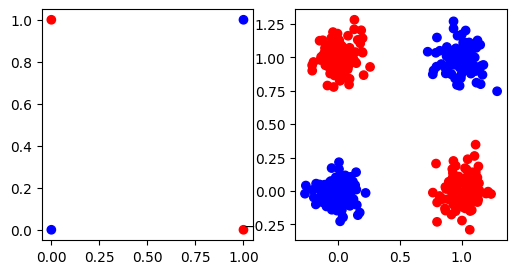

In [21]:
# funkce na zobrazování
def plot_X_y(X, y):
    color = { 0: 'blue', 1: 'red' }
    colors = [color[y[i]] for i in range(len(y))]
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    
plt.figure(figsize=(6,3))
ax1 = plt.subplot(121)
plot_X_y(X, y)
ax2 = plt.subplot(122)
plot_X_y(Xm, ym)
plt.show()

### Model neuronové sítě

Síť sestrojíme z elementů, které odpovídají jednotlivým vrstvám, [torch.nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear), a aktivačním funkcím, `torch.nn.functional.relu` a `torch.nn.functional.relu` (viz [torch.nn.functional](https://pytorch.org/docs/stable/nn.functional.html#non-linear-activation-functions)).

Zároveň tento model vytvoříme jako podtřídu [torch.nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html), která zajistí automatické rozpoznání parametrů atd.

Pro začátek implementujeme dvě metody:
* `__init__` - konstruktor, kde definujeme všechny prvky, které obsahují parametry.
* `forward` - Dopředný chod - tj. funkci, která ze vstupů spočte výstup.

Pro pozdější použití ještě implmentujeme:
* `predict` - udělá finální predikce
* `predict_proba` - bude pouze wrapper na forward, kdy nebudeme trackovat gradient

In [22]:
from torch import nn
import torch.nn.functional as F

In [23]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        """
        Constructor - defines all elements with parameters
        """
        super().__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)

    def forward(self, x):
        """
        Calculation of the output of the network
        """
        x = F.relu(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        return x
    
    def predict_proba(self, x):
        """
        Wrapper that returns the probabilities
        """
        dataX = torch.tensor(x, dtype=torch.float)
        with torch.no_grad():
            pred = self.forward(dataX)
        return pred.numpy().flatten()
    
    def predict(self, x):
        """
        Final predictions
        """
        return (self.predict_proba(x) > 0.5).astype('int32')
        

model = NeuralNetwork()
print(model)

NeuralNetwork(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)


### Spuštění modelu na datech
Model můžeme snadno **spustit** na data. V takovém případě ho prostě použijeme jako funkci.
Protože při tomto kroku nechceme sledovat gradient, uděláme to v kontextu `with torch.no_grad()`.

Než to ale provedeme, musíme si data uložit jako tenzory.

In [24]:
dataX = torch.tensor(X).type(torch.float)
datay = torch.tensor(y).type(torch.long)

print("Vstup")
print("x =",dataX)

print("\nVýstup sítě")
with torch.no_grad():
    print(model(dataX))

Vstup
x = tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

Výstup sítě
tensor([[0.5729],
        [0.6408],
        [0.5109],
        [0.5816]])


### Parametry modelu

Můžeme se podívat na aktuální hodnoty parametrů modelu, které jsou nějak defaultně inicializovány.

In [25]:
for name, param in model.named_parameters():
    print(name,"\n",param)

fc1.weight 
 Parameter containing:
tensor([[ 0.4030, -0.4315],
        [ 0.4243, -0.5181]], requires_grad=True)
fc1.bias 
 Parameter containing:
tensor([0.4776, 0.6540], requires_grad=True)
fc2.weight 
 Parameter containing:
tensor([[-0.3227, -0.2823]], requires_grad=True)
fc2.bias 
 Parameter containing:
tensor([0.6322], requires_grad=True)


### Náhodná inicializace parametrů
Pokud nám defaultní inicializace nevyhovuje (obecně by neměla), může je re-inicializovat.

K tomu použijeme funkce v namespace [torch.nn.init](https://pytorch.org/docs/stable/nn.init.html).

Zároveň si nastavíme napevno náhodný seed.

In [26]:
torch.manual_seed(1)
torch.nn.init.normal_(model.fc1.weight)
torch.nn.init.zeros_(model.fc1.bias)
torch.nn.init.normal_(model.fc2.weight)
torch.nn.init.zeros_(model.fc2.bias)

for param in model.parameters():
    print(param)

Parameter containing:
tensor([[0.6614, 0.2669],
        [0.0617, 0.6213]], requires_grad=True)
Parameter containing:
tensor([0., 0.], requires_grad=True)
Parameter containing:
tensor([[-0.4519, -0.1661]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


### Manuální nastavení parametrů

Parametry můžeme také nastavit manuálně.

In [27]:
# model.fc1.weight.data = torch.tensor([[ 0.9184, -0.6461], [-0.5820,  1.5953]])
# model.fc1.bias.data = torch.tensor([-0.0075,  0.5449])
# model.fc2.weight.data = torch.tensor([[-0.4268, -0.2199]])
# model.fc2.bias.data = torch.tensor([0.4188])

for param in model.parameters():
    print(param)

Parameter containing:
tensor([[0.6614, 0.2669],
        [0.0617, 0.6213]], requires_grad=True)
Parameter containing:
tensor([0., 0.], requires_grad=True)
Parameter containing:
tensor([[-0.4519, -0.1661]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


### Příprava trénování

Připravíme si ztrátovou funkci a optimizer.
* Jako ztrátovou funkci použijeme [binární relativní entropii](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html).
* Jako optimizer použijeme obyčejný [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html).

In [28]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

### Trénování

Připravíme si funkci, která provede trénování v předem zvoleném počtu epoch (kroků).

 step 1000 loss: 0.1431
 step 2000 loss: 0.0359
 step 3000 loss: 0.0195
 step 4000 loss: 0.0134
 step 5000 loss: 0.0102


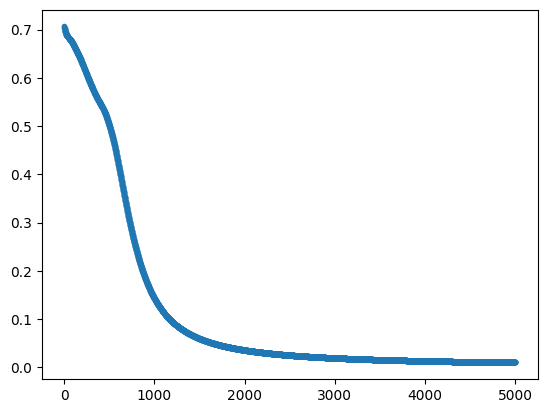

In [29]:
def train(X, y, model, epochs, loss_fn, optimizer, print_res = True):
    dataX = torch.tensor(X, dtype=torch.float)
    datay = torch.tensor(y, dtype=torch.float).reshape(-1,1)
    losses = []
    for i in range(epochs):
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # Compute prediction error (forward)
        pred = model(dataX)
        loss = loss_fn(pred, datay)

        # Backpropagation
        loss.backward()
        
        # Optimization step
        optimizer.step()
        
        # Save loss value - loss je tenzor s jedním prvkem. Voláním .item() toto jedno číslo získáme - bez toho aby se trackoval gradient.
        loss = loss.item()
        losses.append(loss)
        
        if print_res and (i % 1000 == 999):
            print(f" step {i+1} loss: {loss:.4f}")
        
    return losses
        
losses = train(Xm, ym, model, 5000, loss_fn, optimizer)

plt.plot(range(1,len(losses)+1),losses, '.')
plt.show()

### Predikce jednotlivých tříd a vizualizace hranice

Podívejme se, jak se model natrénoval.

In [30]:
print('Predikce tříd:', model.predict(X))
print('Predikce tříd:', model.predict_proba(X))
print('Skutečné třídy:', y)

from sklearn.metrics import accuracy_score
acc = accuracy_score(ym, model.predict(Xm))
print(f"Výsledná přesnost na velkém datasetu: {acc}")

Predikce tříd: [0 1 1 0]
Predikce tříd: [1.2995397e-02 9.9902761e-01 9.9937350e-01 7.3624676e-04]
Skutečné třídy: [0 1 1 0]
Výsledná přesnost na velkém datasetu: 1.0


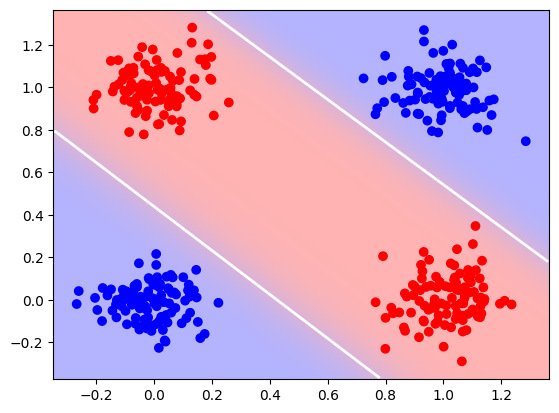

In [31]:
plot_X_y(Xm, ym)
nx, ny = 250, 150
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
Z = 1 - model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(
    xx, yy, Z, cmap="red_blue_classes", norm=colors.Normalize(0.0, 1.0), zorder=0
)
plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="white")

plt.show()

### Důležitost inicializace vah

Podívejme se nyní, kdybychom znovu náhodně inicializovali váhy a opakovali trénování, co se stane.

Zkusíme to udělat 10x.

In [32]:
torch.manual_seed(2)
for i in range(10):
    torch.nn.init.normal_(model.fc1.weight)
    torch.nn.init.zeros_(model.fc1.bias)
    torch.nn.init.normal_(model.fc2.weight)
    torch.nn.init.zeros_(model.fc2.bias)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
    train(Xm, ym, model, 5000, loss_fn, optimizer, print_res = False)
    acc = accuracy_score(ym, model.predict(Xm))
    print(acc)

0.75
0.525
0.75
0.75
1.0
1.0
0.75
0.75
0.75
1.0


Vidíme, že se ve většině případů nedokáže natrénovat. Nejspíše uvízne okolo nějakých lokálních extrémů.

Podívejme se, že se to nezlepší ani když použijeme jinou náhodnou inicializaci a optimizer Adam.

In [33]:
torch.manual_seed(2)
for i in range(10):
    torch.nn.init.xavier_uniform_(model.fc1.weight)
    torch.nn.init.zeros_(model.fc1.bias)
    torch.nn.init.xavier_uniform_(model.fc2.weight)
    torch.nn.init.zeros_(model.fc2.bias)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
    train(Xm, ym, model, 5000, loss_fn, optimizer, print_res = False)
    acc = accuracy_score(ym, model.predict(Xm))
    print(acc)

0.75
0.75
0.75
0.75
1.0
1.0
1.0
1.0
0.525
0.75


# Neuronová síť na reálných datech

Použijeme nyní neuronovou síť na dataset MNIST.
Vezmeme si ho z knihovny `torchvision` [zde](https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST)

Pak ale uděláme úkrok stranou (to bychom nemuseli) a vezmeme si z něj data do numpy.

In [34]:
import torchvision

MNIST_data = torchvision.datasets.MNIST('MNIST/', download=True, train=True, transform=torchvision.transforms.ToTensor())

source_images = MNIST_data.data.numpy()/255
source_labels = MNIST_data.targets.numpy()

print(source_images.shape, source_labels.shape)

(60000, 28, 28) (60000,)


Změníme rozměry pole s obrázkovými daty na standardní formát [N,C,H,W], kde
* N - je počet obrázků (datových bodů)
* C - je počet kanálů (u stupňu šedi pouze jeden, u RGB 3)
* H - počet pixelů na výšku
* W - počet pixelů na šířku

In [35]:
source_images = source_images.reshape(-1,1, 28,28)
print(source_images.shape, source_labels.shape)

(60000, 1, 28, 28) (60000,)


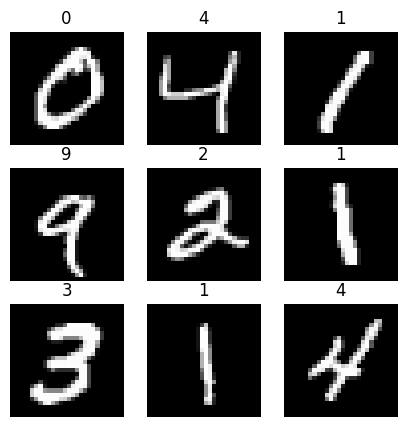

In [36]:
figure = plt.figure(figsize=(5, 5))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    img = source_images[i,0,:,:]
    label = source_labels[i]
    figure.add_subplot(rows, cols, i)
    plt.title(f"{label}")
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()

### Příprava datasetu pro PyTorch

Pro práci s daty při trénování, tj. vytváření dávek, iterování přes ně atd., se v knihovně `PyTorch` používají různé podtřídy [torch.utils.data.Dataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset).

Detailní tutoriál je [zde](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).

V našem případě si data převedeme na tensory a použijeme `torch.utils.data.TensorDataset`.

In [37]:
dataset = torch.utils.data.TensorDataset(torch.tensor(source_images, dtype = torch.float), torch.tensor(source_labels, dtype = torch.long))

print(f"Počet prvků datasetu: {len(dataset)}")

Počet prvků datasetu: 60000


In [38]:
# dataset[0]

### Přístup k bodům datasetu

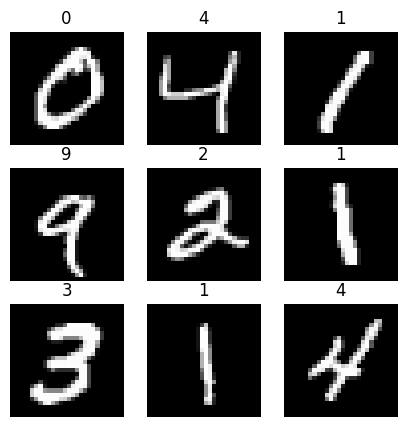

In [39]:
figure = plt.figure(figsize=(5, 5))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    img, label = dataset[i]
    figure.add_subplot(rows, cols, i)
    plt.title(f"{label}")
    plt.axis("off")
    plt.imshow(img[0,:,:], cmap="gray")
plt.show()

### Rozdělení dat na trénovací a validační

Využijeme `torch.utils.data.random_split` s konrétním seedem.

In [40]:
generator1 = torch.Generator().manual_seed(42)
train_data, val_data = torch.utils.data.random_split(dataset, [0.8, 0.2], generator1)
print("The length of train data is:",len(train_data))
print("The length of val data is:",len(val_data))

The length of train data is: 48000
The length of val data is: 12000


### Data pro dávkové učení

Připravíme dávkovač, který je schopný při trénování dodávat dávky. Použijeme k tomu `torch.utils.data.DataLoader`.

In [41]:
training_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
validation_loader = torch.utils.data.DataLoader(val_data, batch_size=128, shuffle=False)

In [42]:
dataiter = iter(training_loader)
images, labels = next(dataiter)
print(images.shape)
print(labels.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


## Model neuronové sítě

Vyrobíme klasickou dopřednou síť, která na výstupu bude mít 10 neuronů.
Jako ztrátovou funkci použijeme kategorickou relativní entropii v implementaci [torch.nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html), která má softmax v sobě - takže na výstupu necháme prostě neurony bez aktivační funkce.

In [43]:
class MyNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 16)
        self.fco = nn.Linear(16, 10)

    def forward(self, x):
        x = x.flatten(start_dim = 1)
        x = F.relu(self.fc1(x))
        x = self.fco(x)
        return x

model = MyNet()

# zkusíme tam dát data
outputs = model(images)
print(images.shape, outputs.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32, 10])


### Parametry a jejich počet

Projděme si jednotlivé parametry a jejich počty.

In [44]:
num_params = 0
for name, param in model.named_parameters():
    print(f"{name}\n# {param.numel()}")
    num_params += param.numel()
    
print(f"\nCelkový počet parametrů: {num_params}")

fc1.weight
# 12544
fc1.bias
# 16
fco.weight
# 160
fco.bias
# 10

Celkový počet parametrů: 12730


### Ztrátová funkce

Použijeme kategorickou relativní entropii v implementaci [torch.nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

Tato funkce pro každou dávku vrací průměrnou chybu predikce.

In [45]:
loss_fn = torch.nn.CrossEntropyLoss()

loss = loss_fn(outputs, labels)
print('Total loss for this batch: {}'.format(loss.item()))

Total loss for this batch: 2.3167431354522705


### Optimizer

Jako optimizer použijeme Adam.

In [46]:
# Optimizers specified in the torch.optim package
optimizer = torch.optim.Adam(model.parameters())

### Trénování jedné epochy

Napíšeme funkci, která provede natrénování jedné epochy modelu.

In [47]:
def train_one_epoch(model, loss_fn, optimizer, training_loader):
    running_cum_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        
        # Backpropagation
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        last_mean_loss = loss.item()
        running_cum_loss += last_mean_loss * inputs.shape[0]
        if i % 300 == 299:
            print(f"  batch {i+1} loss: {last_mean_loss:.3f}")
            
    # Return of the average over the whole training set
    return running_cum_loss / len(train_data)

loss = train_one_epoch(model, loss_fn, optimizer, training_loader)
print(f"Celková trénovací chyba: {loss}")

  batch 300 loss: 0.544
  batch 600 loss: 0.570
  batch 900 loss: 0.214
  batch 1200 loss: 0.185
  batch 1500 loss: 0.309
Celková trénovací chyba: 0.4871833895643552


### Trénovací smyčka přes několik epoch

Připravíme si cyklus, ktere provede trénování v několika epochách. 

Na konci každé epochy si na validační množině spočteme: 
* průměrnou hodnotu ztrátové funkce,
* přesnost.

In [48]:
# Initializing in a separate cell so we can easily add more epochs to the same run
EPOCHS = 2

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch + 1))

    # One training step
    avg_loss = train_one_epoch(model, loss_fn, optimizer, training_loader)

    # Validation performance
    running_cum_vloss = 0.0
    vcorrect = 0
    for i, vdata in enumerate(validation_loader):
        vinputs, vlabels = vdata
        with torch.no_grad():
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
        running_cum_vloss += vloss * vinputs.shape[0]
        # count the correctly classified samoples
        vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
    # Get average loss and accuraccy
    avg_vloss = running_cum_vloss / len(val_data)
    vacc = vcorrect / len(val_data)
    
    print(f"TRAIN loss: {avg_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, accuraccy: {vacc:.3f}")

EPOCH 1:
  batch 300 loss: 0.236
  batch 600 loss: 0.359
  batch 900 loss: 0.157
  batch 1200 loss: 0.147
  batch 1500 loss: 0.142
TRAIN loss: 0.265, VALIDATION loss: 0.266, accuraccy: 0.924
EPOCH 2:
  batch 300 loss: 0.171
  batch 600 loss: 0.476
  batch 900 loss: 0.122
  batch 1200 loss: 0.091
  batch 1500 loss: 0.223
TRAIN loss: 0.232, VALIDATION loss: 0.252, accuraccy: 0.928


### Ukázka výsledku na validačních datech

Podíváme se, jak model predikuje na první dávce validačních dat.

In [49]:
dataiter = iter(validation_loader)
images, labels = next(dataiter)
print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


Použijeme funkci `argmax`, která na tenzoru vrátí index prvku, který nabývá maxima.

In [50]:
with torch.no_grad():
    print(model(images).argmax(dim = 1))

print(labels.flatten())

tensor([2, 8, 7, 9, 2, 1, 5, 2, 8, 6, 6, 4, 7, 3, 4, 6, 2, 2, 8, 4, 9, 7, 6, 2,
        3, 2, 9, 8, 3, 1, 1, 0, 8, 0, 0, 4, 1, 8, 7, 9, 0, 6, 9, 7, 7, 0, 5, 9,
        2, 1, 4, 5, 9, 8, 6, 8, 6, 7, 7, 8, 5, 5, 9, 5, 1, 9, 5, 8, 6, 2, 3, 7,
        7, 6, 8, 9, 3, 1, 4, 5, 6, 4, 0, 9, 8, 1, 1, 4, 5, 4, 4, 1, 8, 4, 4, 2,
        6, 4, 2, 3, 6, 0, 0, 8, 3, 7, 6, 2, 1, 1, 3, 0, 4, 1, 4, 9, 7, 5, 1, 9,
        6, 4, 2, 9, 3, 8, 4, 9])
tensor([2, 8, 7, 9, 2, 1, 5, 2, 8, 6, 6, 5, 7, 3, 4, 6, 2, 0, 8, 4, 9, 7, 6, 2,
        3, 2, 9, 8, 3, 1, 1, 0, 8, 0, 0, 4, 2, 8, 7, 9, 9, 6, 9, 7, 7, 0, 5, 9,
        2, 1, 4, 5, 9, 8, 6, 8, 6, 7, 7, 8, 5, 5, 9, 5, 1, 9, 5, 8, 6, 2, 3, 7,
        7, 6, 8, 7, 3, 1, 4, 5, 6, 4, 0, 9, 8, 1, 1, 4, 5, 4, 4, 1, 8, 4, 4, 3,
        6, 4, 2, 3, 6, 0, 0, 8, 3, 7, 6, 2, 1, 1, 3, 0, 4, 1, 4, 9, 7, 9, 1, 9,
        6, 7, 2, 9, 2, 8, 4, 9])


### Predikce pravděpodobností

Pomocí funkce `softmax` transformujeme výstup sítě na pravděpodobnosti příslušnosti k jednotlivým třídám.

In [51]:
with torch.no_grad():
    probabs = F.softmax(model(images), dim = 1)
    
print(probabs[0])

tensor([8.2681e-06, 6.1226e-04, 9.5849e-01, 4.2920e-04, 3.3759e-06, 1.8598e-04,
        1.7508e-02, 2.2683e-02, 7.7210e-05, 2.2058e-08])
